# This code below was built off of 1_cleaning.ipynb


In [1]:
import os
import pandas as pd
import numpy as np

LOCAL_PATH = "/content/Recipe Reviews and User Feedback Dataset.csv"

df = pd.read_csv(LOCAL_PATH)
display(df.head())

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,Bush used to have a white chili bean and it ma...
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,I have a very complicated white chicken chili ...
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction, you mentioned cream chee..."
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...


In [2]:
#drop any rows with missing values
df_cleaned = df.dropna()
display(df_cleaned.head())

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,Bush used to have a white chili bean and it ma...
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,I have a very complicated white chicken chili ...
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction, you mentioned cream chee..."
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...


In [3]:
#show that there are no more missing values
display(df_cleaned.isnull().sum())

,0
Unnamed: 0,0
recipe_number,0
recipe_code,0
recipe_name,0
comment_id,0
user_id,0
user_name,0
user_reputation,0
created_at,0
reply_count,0


In [4]:
#drop all the unnecessary columns
columns_drop = ['recipe_code', 'comment_id', 'user_id', 'user_name', 'created_at', 'reply_count', 'best_score']
df_cleaned = df_cleaned.drop(columns=columns_drop)
display(df_cleaned.head())

,Unnamed: 0,recipe_number,recipe_name,user_reputation,thumbs_up,thumbs_down,stars,text
0,0,1,Creamy White Chili,1,0,0,5,"I tweaked it a little, removed onions because ..."
1,1,1,Creamy White Chili,50,7,0,5,Bush used to have a white chili bean and it ma...
2,2,1,Creamy White Chili,10,3,0,5,I have a very complicated white chicken chili ...
3,3,1,Creamy White Chili,1,2,0,0,"In your introduction, you mentioned cream chee..."
4,4,1,Creamy White Chili,10,7,0,0,Wonderful! I made this for a &#34;Chili/Stew&#...


# Exploratory Plots

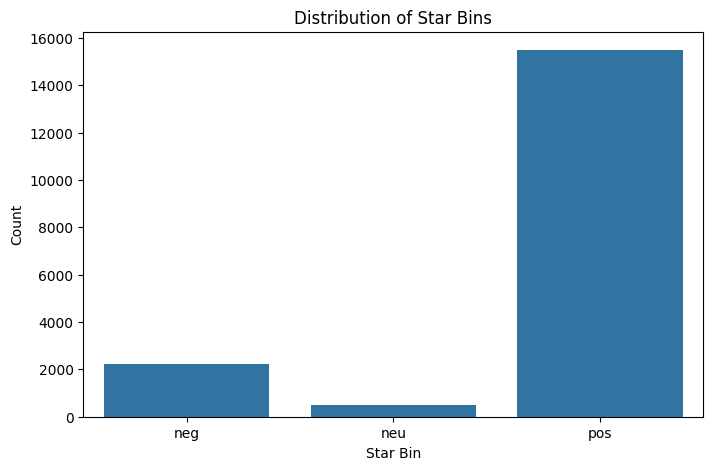

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of star_bin distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df_cleaned, x='star_bin', order=['neg', 'neu', 'pos'])
plt.title('Distribution of Star Bins')
plt.xlabel('Star Bin')
plt.ylabel('Count')
plt.show()

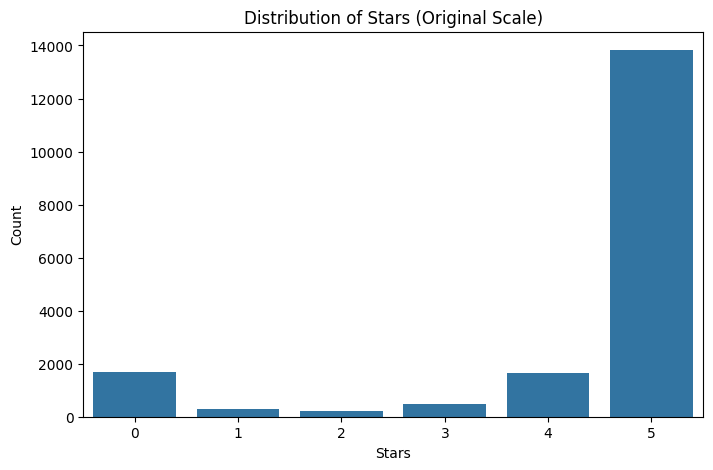

In [14]:
# Histogram of stars distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df_cleaned, x='stars', order=sorted(df_cleaned['stars'].unique()))
plt.title('Distribution of Stars (Original Scale)')
plt.xlabel('Stars')
plt.ylabel('Count')
plt.show()

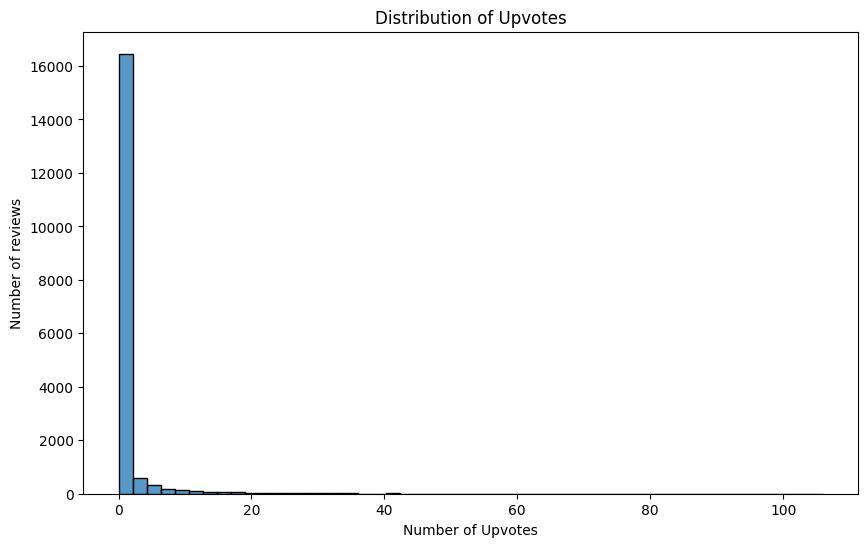

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_cleaned, x='thumbs_up', bins=50, kde=False)
plt.title('Distribution of Upvotes')
plt.xlabel('Number of Upvotes')
plt.ylabel('Number of reviews')
plt.show()